# About Project: IMDB Movie Analysis
## Objective:
As a data analyst intern at IMDB, you have been tasked with exploring and analyzing the IMDB Movies dataset. Your goal is to answer specific business questions, gain insights into movie trends, and deliver actionable recommendations. Using Python and libraries such as Pandas, NumPy, Seaborn, and Matplotlib, perform analysis to help IMDB better understand genre popularity, rating trends, and factors influencing movie success.
## Tools and Libraries Used
- **Python**
- **Pandas:** Data manipulation and analysis
- **NumPy:** Numerical computations
- **Matplotlib:** Data visualization
- **Seaborn:** Advanced visualization
## About Company
IMDb (Internet Movie Database) is a comprehensive online database of information about films, television shows, video games, and online streaming content. It includes details such as cast and crew, plot summaries, user reviews, trivia, and ratings. Established in 1990, IMDb has become one of the most popular platforms for movie enthusiasts and industry professionals alike. It features user-generated content, professional critiques, and a proprietary rating system based on user votes. Owned by Amazon since 1998, IMDb also offers a subscription service, IMDbPro, providing industry-focused features like contact information and production updates.
## Dataset Overview
The dataset includes the following columns:

- **names:** Movie titles
- **date_x:** Release dates
- **score:** IMDB ratings
- **genre:** Genres
- **overview:** Movie summaries
- **crew:** Cast and crew information
- **orig_title:** Original titles
- **status:** Release status (e.g., released, post-production)
- **orig_lang:** Original language
- **budget_x:** Production budgets
- **revenue:** Box office revenues
- **country:** Production country

## Loading the dataset and Perform initial setup
**Task: Load the dataset and perform initial setup**

In [1]:
#importing libraries used in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to load the dataset
data = "imdb_movies.csv"
df = pd.read_csv(data)

#to display the top 5 rows of datasets
df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


## Data Overview and Basic Exploration
**Task: Explore the structure and composition of the dataset**

In [2]:
#to check the number of columns and rows in the dataset
print("No. of rows and column: ", df.shape)

#to get the dataset information
df.info()

No. of rows and column:  (10178, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


- **Rows: Each row represents a unique movie and contains details like its title, genre, release date, rating, and other attributes.**
- **Columns: Each column represents a feature or attribute of the movies, such as genre, budget_x, revenue, etc.**

In [3]:
#as the data type of date_x column is object, which is incorrect
#to convert the data type of date_x columns into datetime data type
df["date_x"] = pd.to_datetime(df["date_x"])

#to check the data set info to check if the date_x is converted to date data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   names       10178 non-null  object        
 1   date_x      10178 non-null  datetime64[ns]
 2   score       10178 non-null  float64       
 3   genre       10093 non-null  object        
 4   overview    10178 non-null  object        
 5   crew        10122 non-null  object        
 6   orig_title  10178 non-null  object        
 7   status      10178 non-null  object        
 8   orig_lang   10178 non-null  object        
 9   budget_x    10178 non-null  float64       
 10  revenue     10178 non-null  float64       
 11  country     10178 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 954.3+ KB


In [4]:
#to check the statistic summary for the numerical columns
df.describe()

,date_x,score,budget_x,revenue
count,10178,10178.000000,1.017800e+04,1.017800e+04
mean,2008-06-15 06:16:37.445470720,63.497052,6.488238e+07,2.531401e+08
min,1903-05-15 00:00:00,0.000000,1.000000e+00,0.000000e+00
25%,2001-12-25 06:00:00,59.000000,1.500000e+07,2.858898e+07
50%,2013-05-09 00:00:00,65.000000,5.000000e+07,1.529349e+08
75%,2019-10-17 00:00:00,71.000000,1.050000e+08,4.178021e+08
max,2023-12-31 00:00:00,100.000000,4.600000e+08,2.923706e+09
std,NaN,13.537012,5.707565e+07,2.777880e+08


In [5]:
#to check the null values in each column 
df.isnull().sum()

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

## Data Cleaning
**Task: Address missing values, data types, and outliers.**

In [6]:
#to check the number of null values in entire table
print("Number of null values in data set: ", df.isnull().sum().sum())

Number of null values in data set:  141


In [7]:
#Dealing with null values
#genre & crew have null values and it's data type is object, so we can fill it with the "unavailable"

df["genre"] = df["genre"].fillna("unavailable")
df["crew"] = df["crew"].fillna("unavailable") 


#to check again, if all the null values are filled
df.isnull().sum()

names         0
date_x        0
score         0
genre         0
overview      0
crew          0
orig_title    0
status        0
orig_lang     0
budget_x      0
revenue       0
country       0
dtype: int64

## Univariate Analysis: Explore each column individually
**Task: Perform univariate analysis on numerical and categorical variables**

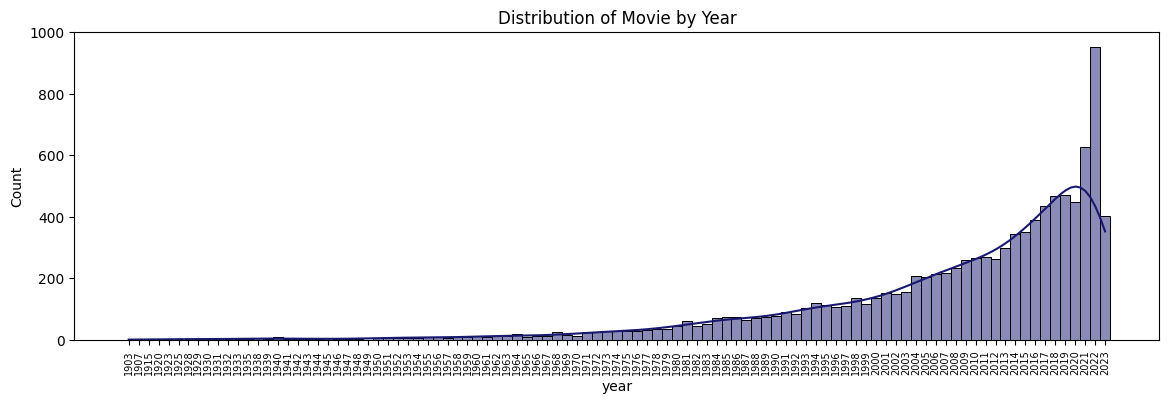

In [8]:
#Analyze the distribution of Movie by years using a histogram and descirbe it's shape

#firstly we need to create a new column for years
df["year"] = df["date_x"].dt.strftime("%Y")

#Plotting the distribution of Movie by years 

df = df.sort_values(by='year')
plt.figure(figsize=(14,4))
sns.histplot(df["year"], kde = True, bins = 20, color = "midnightblue")
plt.xticks(rotation = 90, fontsize=7)
plt.title("Distribution of Movie by Year")
plt.show()

### The distribution of movies by year shows:

- **A significant increase in movie production over time, especially from the 1990s onwards.**
- **A peak in recent years, particularly around 2020-2022, followed by a slight decline.**
- **Early years (1900s-1950s) had very few movie releases compared to modern times.**

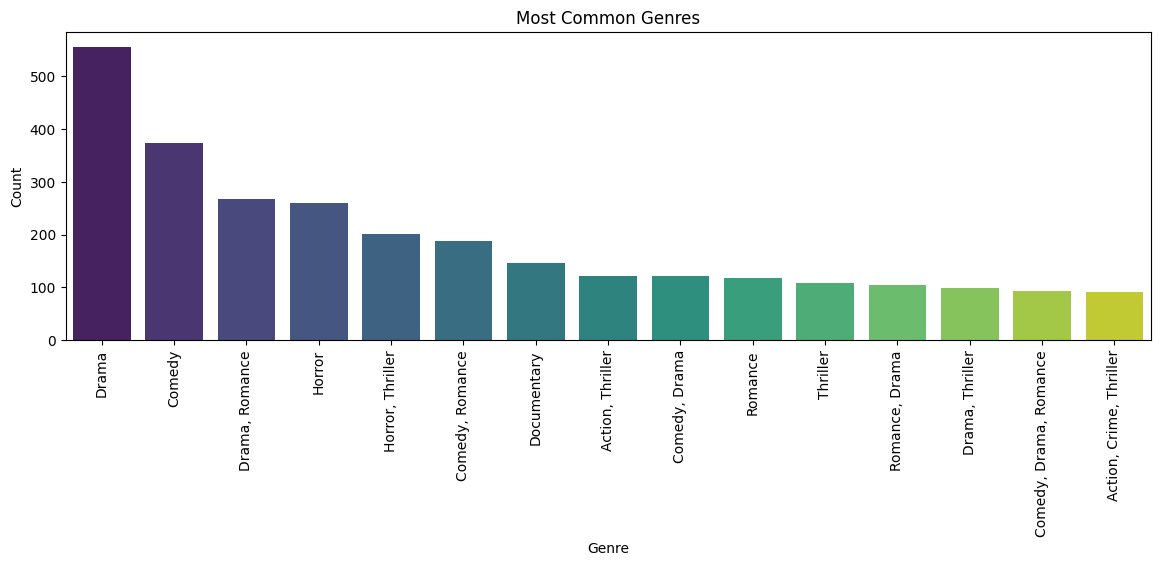

The most common genre in the dataset is: Drama


In [9]:
# What are the most common genres in the dataset? Use a bar chart to show their distribution.

# Group by genre and count the number of movies
gb = df.groupby("genre").agg({"names": "count"})
gb = gb.sort_values(by="names", ascending=False)
gb = gb.head(15)

# Plotting the bar chart
plt.figure(figsize=(14, 4))
sns.barplot(x=gb.index,y=gb["names"],data=gb,hue=gb.index, palette = "viridis")
plt.title("Most Common Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

# Print the most common genre
most_common_genre = gb.index[0]
print(f"The most common genre in the dataset is: {most_common_genre}")

**The most common genre in the dataset is: Drama**

## Bivariate Analysis: Explore relationships between two variables.
**Task: Use scatter plots, box plots, and correlation analysis.**

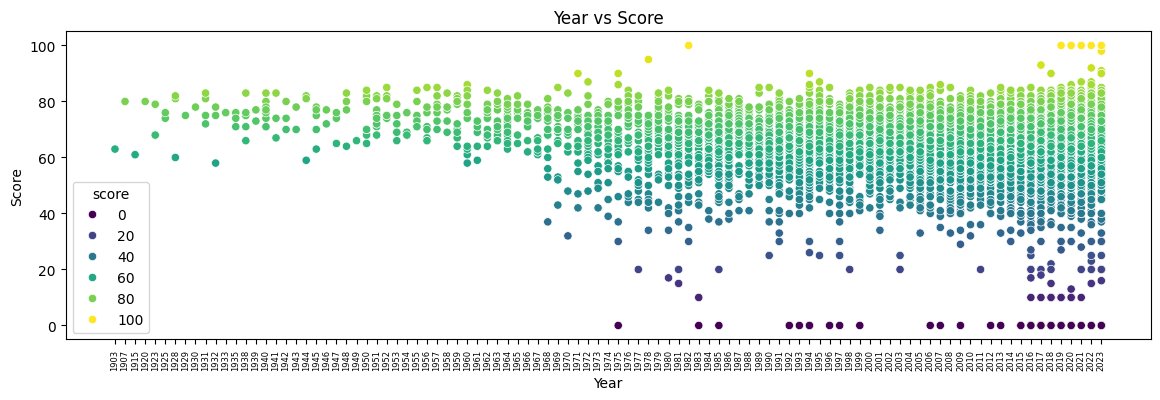

In [10]:
# Relationship between a movie’s release year and its score using a scatter plot.
# Plotting the scatter plot
plt.figure(figsize=(14,4))
sns.scatterplot(x="year", y = "score",data = df, hue="score", palette = "viridis")
plt.title("Year vs Score")
plt.xlabel("Year")
plt.ylabel("Score")
plt.xticks(rotation=90, fontsize=6)
plt.show()

## The relationship of year and score shows that:
- **Scores remain consistent between 60 and 90 across all years, with minimal variation.**
- **High scores (close to 100) are more frequent in recent years, indicating an increase in critically acclaimed movies.**
- **Low scores (below 40) persist throughout the timeline, showing the steady production of poorly rated movies.**

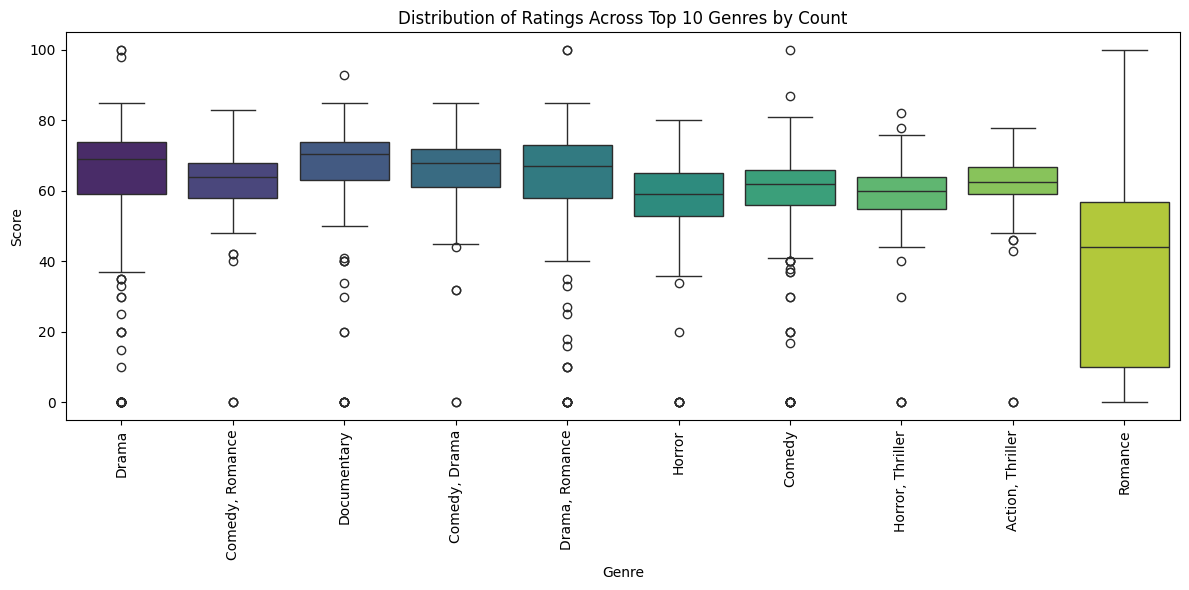

In [11]:
# Compare IMDB ratings (`score`) across different genre using a boxplot. 
# Get the top 10 genres by count
top_genres = df['genre'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 genres
filtered_df = df[df['genre'].isin(top_genres)]

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="genre", y="score", data=filtered_df, hue="genre", palette="viridis")
plt.title("Distribution of Ratings Across Top 10 Genres by Count")
plt.xlabel("Genre")
plt.ylabel("Score")
plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### The IMDB score across different genre:
- **Documentary has the highest median score, indicating generally well-received movies in this genre.**
- **Romance shows the widest range of scores, highlighting significant variability in its ratings.**
- **Drama and Comedy, Drama have consistent ratings with fewer outliers, suggesting stable performance in these genres.**
- **Horror and Comedy have relatively lower median scores, with several outliers indicating a mix of poorly rated movies within these genres.**

In [12]:
#Is there a correlation between the budget and revenue? Create a scatter plot and calculate the correlation coefficient.
# Create a dataframe to store score, budget and revenue and find it's correlation
df1 = df[["score", "budget_x", "revenue"]]
df1.columns = ["Score","Budget", "Revenue"]
corr = df1.corr()
corr

,Score,Budget,Revenue
Score,1.000000,-0.23547,0.096533
Budget,-0.235470,1.00000,0.673830
Revenue,0.096533,0.67383,1.000000


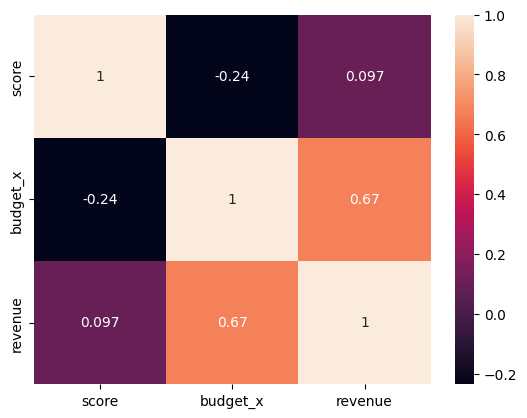

In [13]:
#correlation between `budget_x`, 'revenue' and `score`. 
correlation = df[["score","budget_x","revenue"]]
data = correlation.corr()
sns.heatmap(data, annot = True)
plt.show()

### The Correlation between budget, score and revenue:
- **Score and Budget: A weak negative correlation of -0.235, meaning as the budget increases, the score slightly decreases.**
- **Score and Revenue: A very weak positive correlation of 0.097, suggesting little to no relationship between score and revenue.**
- **Budget and Revenue: A moderate positive correlation of 0.674, indicating that as the budget increases, revenue tends to increase as well.**

## Genre-Specific Analysis
**Task: Delve deeper into the genre of movies.**

In [14]:
# Which genre has the highest average rating? Calculate the average rating for each genre and plot the results.

# Calculate the average rating for each genre
avg_rating_by_genre= df.groupby("genre")["score"].mean().sort_values(ascending=False)
avg_rating_by_genre = avg_rating_by_genre.head(10)
print("\nAverage Ratings by Genre:")
print(avg_rating_by_genre)


Average Ratings by Genre:
genre
Fantasy, Drama, Crime                                 85.000000
Adventure, Animation, Comedy, Fantasy, Mystery        85.000000
Romance, Animation, Drama                             85.000000
Animation, Comedy, Romance                            84.666667
Family, Animation, Drama                              83.000000
Animation, Action, Comedy, Mystery, Crime, Fantasy    83.000000
Animation, Action, Science Fiction, Drama             83.000000
Animation, Action, Adventure, Fantasy, Thriller       83.000000
Animation, Family, Fantasy, Adventure, Comedy         83.000000
Adventure, Fantasy, Animation                         83.000000
Name: score, dtype: float64


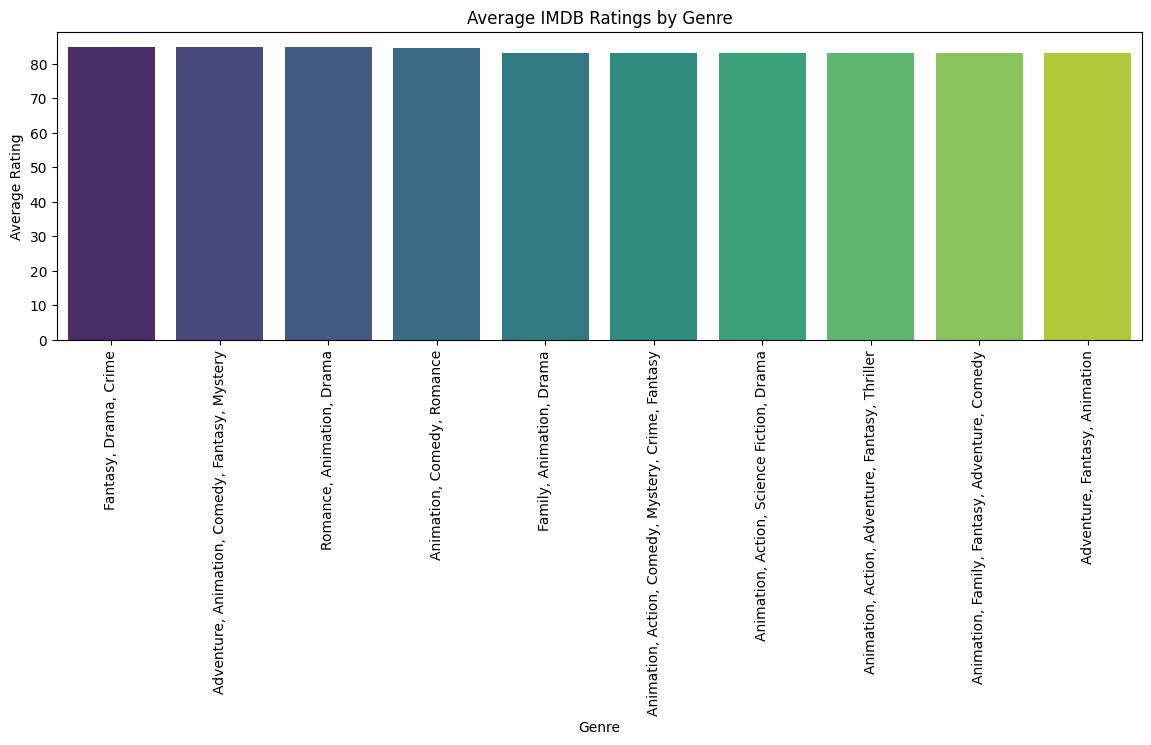

In [15]:
# Plot the graph of average score across genres
plt.figure(figsize=(14, 4))
sns.barplot(x=avg_rating_by_genre.index, y=avg_rating_by_genre.values, hue=avg_rating_by_genre.index, palette='viridis', legend=False)
plt.title("Average IMDB Ratings by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.xticks(rotation=90)
plt.show()

## The Average rating for each genre shows that: 
**(Fantasy, Drama, Crime)(Adventure, Animation, Comedy, Fantasy, Mystery)(Romance, Animation, Drama) have highest average rating of 85.0**

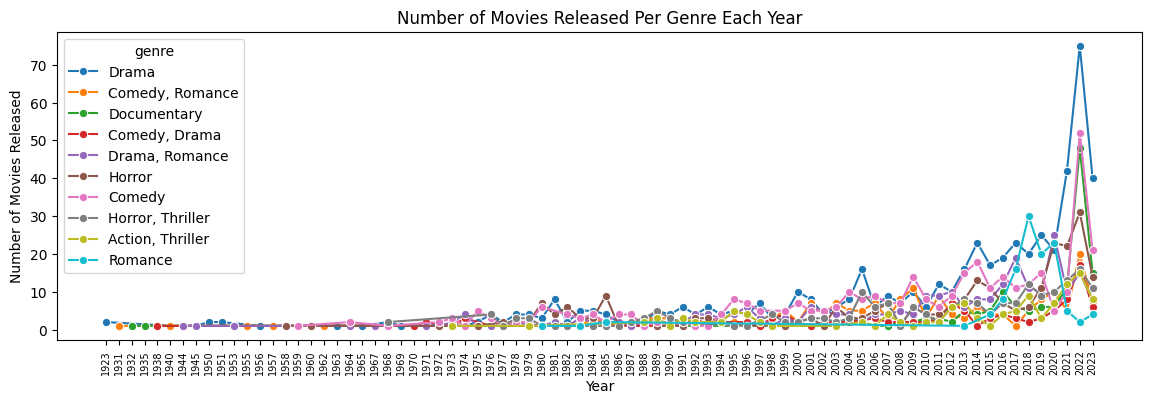

In [16]:
# How does the popularity of genres vary over time? Plot the number of movies released per genre each year.

# Group by 'genre' and 'year', then count movies
movies_per_genre = df.groupby(['year', 'genre']).size().reset_index(name='movie_count')
top_genres = movies_per_genre.groupby('genre')['movie_count'].sum().nlargest(10).index

# Filter the movies data to include only these top genres
filtered_movies = movies_per_genre[movies_per_genre['genre'].isin(top_genres)]

# Plotting Line 
plt.figure(figsize=(14,4))
sns.lineplot(data=filtered_movies, x='year', y='movie_count', hue='genre', marker='o')
plt.title("Number of Movies Released Per Genre Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies Released")
plt.xticks(rotation=90, fontsize=7)
plt.show()

## Year and Trend Analysis
### Task: Analyze trends over time

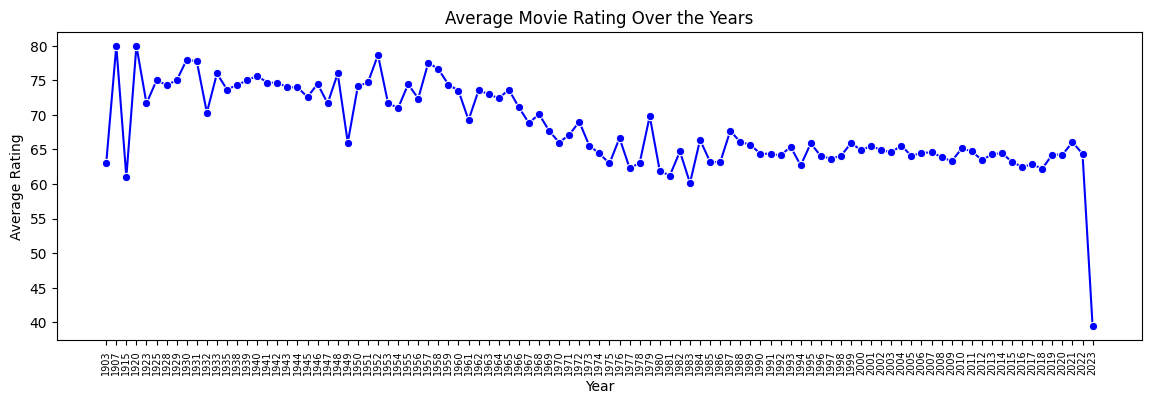

In [17]:
# How has the average movie rating changed over the years? Plot the average rating for each year.  

# Group by 'year' and calculate the average rating ('score') for each year
average_rating_per_year = df.groupby('year')['score'].mean().reset_index()

# Showing line plot for average movie changed over years
plt.figure(figsize=(14,4))
sns.lineplot(data=average_rating_per_year, x='year', y='score', marker='o', color='b')
plt.title("Average Movie Rating Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.xticks(rotation=90, fontsize =7)
plt.show()

### The Average Movie Rating over the years shows that:
- **It shows from 1980 to 2020 the average rating Consistent Movie Quality**
- **There down fall after 2020 in movies may be because expectation of audience**

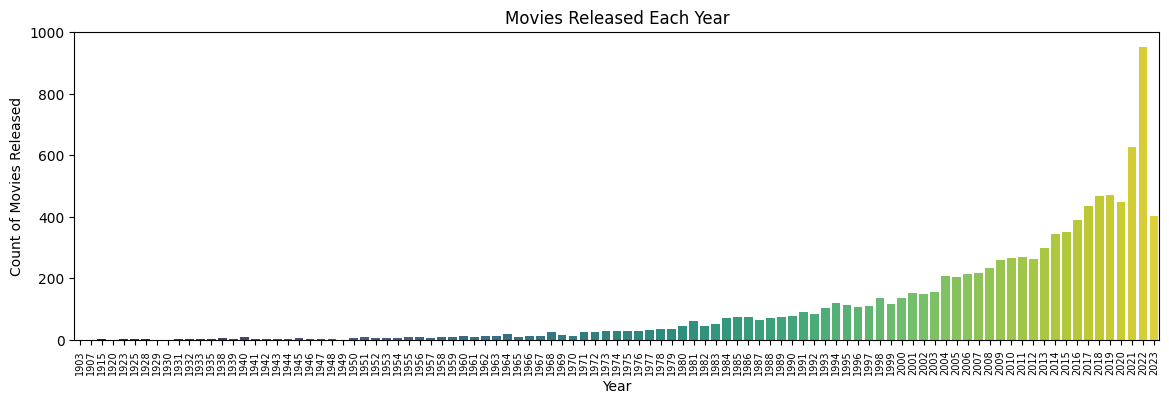

Year with the highest movie releases: 2022
Year with the lowest movie releases: 1903


In [18]:
# Which years had the highest and lowest number of movie releases? Plot the number of movies released each year

# Group by 'year' and count the number of movies released each year
gb4 = df.groupby('year').agg({'names': 'count'})

# Plot the number of movies released each year using a bar plot
plt.figure(figsize=(14,4))
sns.barplot(x=gb4.index, y=gb4['names'], hue=gb4.index, palette='viridis')
plt.ylabel('Count of Movies Released')
plt.xlabel('Year')
plt.title('Movies Released Each Year')
plt.xticks(rotation=90, fontsize=7)
plt.show()

# Find the year with the highest number of movie releases
highest_releases_year = gb4['names'].idxmax()  # This gives the year with the highest releases
print(f"Year with the highest movie releases: {highest_releases_year}")

# Find the year with the lowest number of movie releases
lowest_releases_year = gb4['names'].idxmin()  # This gives the year with the lowest releases
print(f"Year with the lowest movie releases: {lowest_releases_year}")

## Multivariate Analysis: Analyze multiple variables together
**Task: Combine insights from multiple columns to explore complex relationships.**

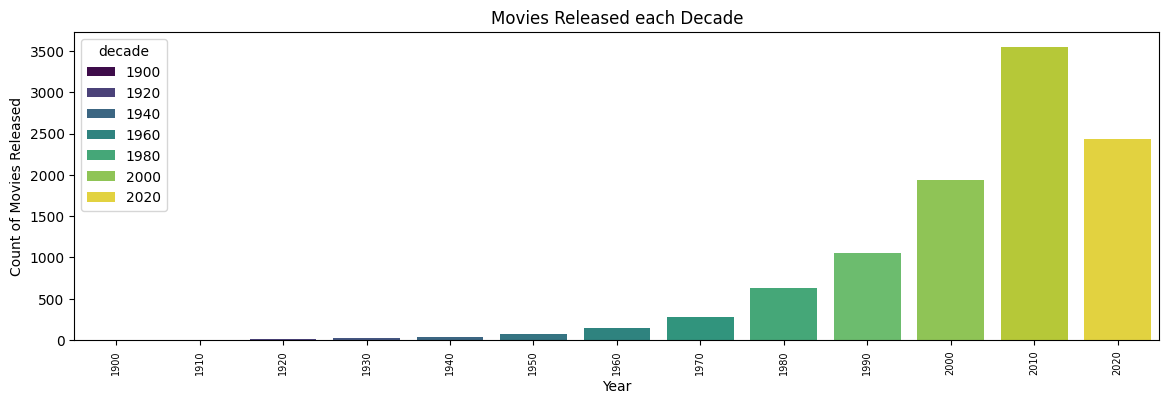

In [19]:
# Which genres are most popular in each decade? Create a bar plot showing the most frequent genres by decade.

df['year'] = pd.to_numeric(df['year'], errors='coerce') 
# Extract the decade from the 'year' column
df['decade'] = (df['year'] // 10) * 10  # Dividing year by 10 and multiplying by 10 to get the start of the decade

# Plot the number of movies released each decade
gb1 = df.groupby('decade').agg({'genre':'count'})
plt.figure(figsize = (14, 4))
sns.barplot(x = gb1.index, y = gb1['genre'], data = gb1, hue = gb1.index, palette = 'viridis')
plt.ylabel('Count of Movies Released')
plt.xlabel('Year')
plt.title('Movies Released each Decade')
plt.xticks(rotation = 90, fontsize = 7)
plt.show()

### The Movies released each decade plot shows that:
- **It shows in 2010 most movies was popular**

In [20]:
# Analyze the influence of `budget_x`, `genre`, and `country` on revenues using a heatmap.

# Select the relevant columns and drop any missing values
df_corr = df[['budget_x', 'revenue', 'score', 'country', 'genre']].dropna()

# Convert categorical columns into numeric values
df_corr['genre'] = pd.factorize(df_corr['genre'])[0]
df_corr['country'] = pd.factorize(df_corr['country'])[0]

# Calculate the correlation between the variables
corr_matrix = df_corr.corr()

print(corr_matrix)

          budget_x   revenue     score   country     genre
budget_x  1.000000  0.673830 -0.235470  0.164900  0.115084
revenue   0.673830  1.000000  0.096533  0.128836  0.088219
score    -0.235470  0.096533  1.000000 -0.204698  0.057878
country   0.164900  0.128836 -0.204698  1.000000 -0.031152
genre     0.115084  0.088219  0.057878 -0.031152  1.000000


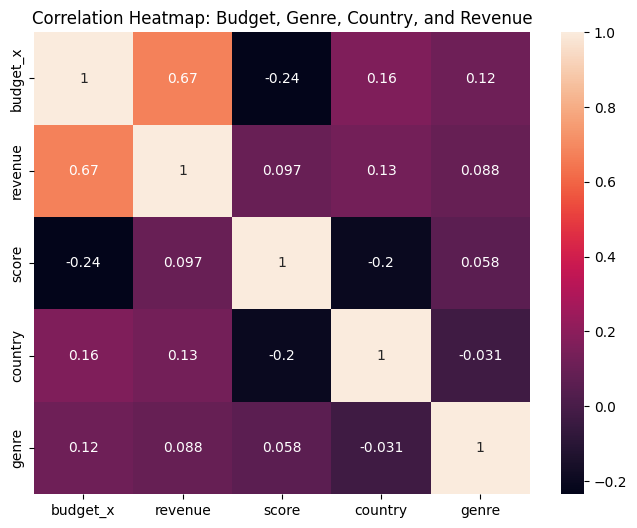

In [21]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Heatmap: Budget, Genre, Country, and Revenue")
plt.show()

### The correlation Heatmap shows that:
- **Budget and revenue are positively correlated (0.67), suggesting that higher-budget movies tend to generate more revenue.**
- **Genre and country have very weak correlations with other variables, indicating that the genre or the country of production does not strongly impact budget or revenue.**
- **Country has a weak positive correlation with revenue suggesting that movies from certain countries might tend to have slightly higher revenue.**

## Additional Questions Beased on Dataset

In [22]:
# Does the original language (`orig_lang`) correlate with ratings?  

# Group by 'orig_lang' and calculate the average rating for each language
avg_rating_by_lang = df.groupby('orig_lang')['score'].mean().sort_values(ascending=False).reset_index()

top= avg_rating_by_lang.head(20)

# Display the results
print("Average Ratings by Original Language:")
print(top)

Average Ratings by Original Language:
                               orig_lang      score
0                                  Irish  76.000000
1                                  Czech  75.500000
2                                Kannada  75.500000
3                               Galician  75.000000
4                               Dzongkha  74.000000
5                               Gujarati  73.000000
6                               Romanian  72.500000
7                              Ukrainian  71.500000
8                                 Arabic  71.500000
9                                  Latin  71.000000
10                    Catalan, Valencian  71.000000
11                                Danish  69.304348
12                               Persian  68.200000
13                                 Hindi  67.653846
14                            Indonesian  67.636364
15   Bokmål, Norwegian, Norwegian Bokmål  67.000000
16                              Japanese  66.899160
17                        

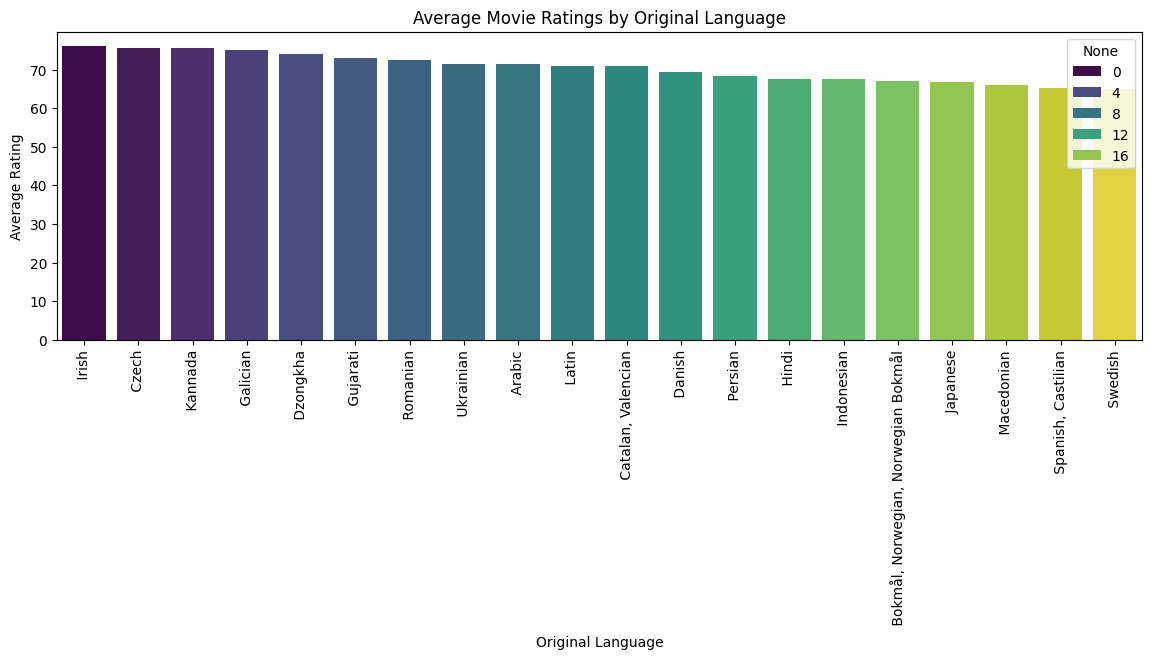

In [23]:
# Plot the results using a barplot
plt.figure(figsize=(14,4))
sns.barplot(data=top, x='orig_lang', y='score', hue = top.index, palette='viridis')
plt.title("Average Movie Ratings by Original Language")
plt.xlabel("Original Language")
plt.ylabel("Average Rating")
plt.xticks(rotation=90, fontsize = 10)
plt.show()

### The Highest Average Movie Ratings show that:
- **Irish original language has highest IMDB Movie Ratings.**

In [24]:
# Which countries produce the highest-rated movies on average? 

# Group by 'country' and calculate the average rating ('score') for each country
average_rating_by_country = df.groupby('country')['score'].mean().sort_values(ascending=False).reset_index()

# Display the top 10 countries with the highest average ratings
top_countries = average_rating_by_country.head(10)
print("Top 10 Countries with Highest Average Movie Ratings:")
print(top_countries)

Top 10 Countries with Highest Average Movie Ratings:
  country      score
0      SU  79.800000
1      PR  76.000000
2      XC  76.000000
3      CZ  72.500000
4      DO  72.000000
5      PY  71.000000
6      MU  70.000000
7      MX  69.771429
8      GT  68.000000
9      DK  67.333333


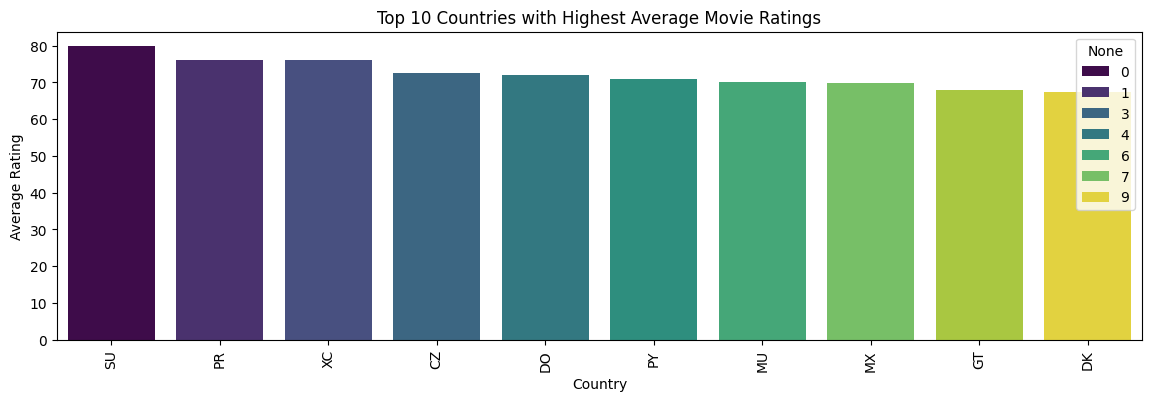

In [25]:
# Plot the results using a barplot
plt.figure(figsize=(14, 4))
sns.barplot(data=top_countries, x='country', y='score',hue=top_countries.index, palette='viridis')
plt.title("Top 10 Countries with Highest Average Movie Ratings")
plt.xlabel("Country")
plt.ylabel("Average Rating")
plt.xticks(rotation=90) 
plt.show()

### The Highest Average movie ratings shows that:
- **It shows that SU has highest average movie ratings**

In [26]:
df["status"]

558      Released
7428     Released
9526     Released
9525     Released
7715     Released
          ...    
622      Released
5119     Released
5122     Released
8390     Released
0        Released
Name: status, Length: 10178, dtype: object

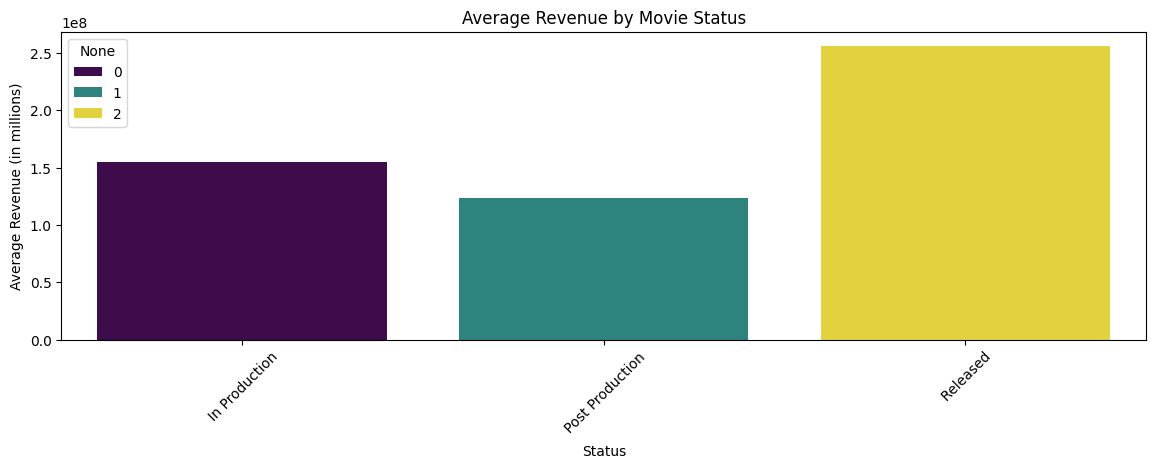

In [27]:
# How does `status` (e.g., released, post-production) influence revenues?  

# Filter out movies with invalid revenue values (e.g., 0 or NaN)
df_filtered_revenue = df[df['revenue'] > 0]  # Filter out rows with zero revenue

# Group by 'status' and calculate the average revenue for each status
avg_revenue_by_status = df_filtered_revenue.groupby('status')['revenue'].mean().reset_index()

# Plot the average revenue by status
plt.figure(figsize=(14, 4))
sns.barplot(data=avg_revenue_by_status, x='status', y='revenue',hue=avg_revenue_by_status.index, palette='viridis')
plt.title("Average Revenue by Movie Status")
plt.xlabel("Status")
plt.ylabel("Average Revenue (in millions)")
plt.xticks(rotation=45)
plt.show()

### The Average revenue by movie status shows that:
- **Status which is Released have highest avergae revenue**

## Insights and Summary
### Task: Summarize key findings

### 1. Budget and Revenue Correlation:
    There is a noticeable positive relationship (correlation of 0.67) between a movie's budget and its revenue, suggesting that higher-budget films are generally more likely to earn significant financial returns. This implies that increased spending on production tends to pay off, though it is not a guarantee. Some high-budget movies underperform, while smaller-budget films can occasionally surpass expectations and achieve exceptional success.

### 2. Stability of Movie Ratings Over Time:
    From 1980 to 2020, the average IMDB ratings for movies have shown remarkable stability, indicating that audience-perceived movie quality has not fluctuated significantly. However, there is a minor decline in ratings after 2020, potentially due to changing audience preferences, reduced cinema experiences during the pandemic, or shifts in the types of movies being produced. This suggests that while the quality remains steady, the way audiences engage with movies is evolving.

### 3. Genre-Based Patterns in Budget and Ratings:
    Genres like Fantasy, Drama, and Crime often receive higher average ratings, reflecting their appeal to audiences, likely due to their compelling narratives or imaginative storytelling. Meanwhile, Action films typically have lower production budgets compared to genres like Comedy and Drama, yet they often achieve strong box-office performance, indicating that action-oriented content remains broadly appealing despite lower investments in production.
   
